#### Tutor name: Heqing (Eric) SHI
#### Contact email: Heqing.Shi@ed.ac.uk
#### Web: [personal page](https://shiheqing.github.io)
*Materials credit to @Zongxiao WU, the previous tutor.*

In [1]:
# import packages that we will use in this session
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('Development_sample.csv')

In [3]:
# have a look of the data
df.head(5)

,Unnamed: 0,ID,FLAGBINARY,PHONE,MSTAT,RSTAT,KIDS,CARDI,CARDH2,AGE,...,AgeGrouped,Age_d_1,Age_d_2,Age_d_3,Age_d_4,Age_d_5,Age_d_6,Age_d_7,Age_d_8,AgeWoe
0,0,1.0,Bad,Home number given,Single,Renting flat,0.0,No card insurance taken,No,65.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.13
1,1,2.0,Good,Home number given,Single,Renting flat,0.0,No card insurance taken,No,22.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.93
2,2,3.0,Bad,No phone number given,Married,Renting house,3.0,No card insurance taken,No,41.0,...,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.23
3,3,5.0,Bad,No phone number given,Widowed,Home owner,6.0,No card insurance taken,No,40.0,...,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.23
4,4,6.0,Good,Home number given,Married,Renting flat,0.0,No card insurance taken,No,70.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.13


In [4]:
# brief introduction of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   ID          5000 non-null   float64
 2   FLAGBINARY  5000 non-null   object 
 3   PHONE       5000 non-null   object 
 4   MSTAT       5000 non-null   object 
 5   RSTAT       5000 non-null   object 
 6   KIDS        5000 non-null   float64
 7   CARDI       5000 non-null   object 
 8   CARDH2      5000 non-null   object 
 9   AGE         5000 non-null   float64
 10  TAD         5000 non-null   float64
 11  BUREAU      5000 non-null   float64
 12  SEARCH      5000 non-null   float64
 13  phone1      5000 non-null   float64
 14  PhoneWoe    5000 non-null   float64
 15  MSgrouped   5000 non-null   float64
 16  Married1    5000 non-null   float64
 17  Married2    5000 non-null   float64
 18  MSwoe       5000 non-null   float64
 19  AgeBinned   5000 non-null  

### 1. Explore the data.

In [5]:
# only include those variables that we need
df = df[df.columns[1:13]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          5000 non-null   float64
 1   FLAGBINARY  5000 non-null   object 
 2   PHONE       5000 non-null   object 
 3   MSTAT       5000 non-null   object 
 4   RSTAT       5000 non-null   object 
 5   KIDS        5000 non-null   float64
 6   CARDI       5000 non-null   object 
 7   CARDH2      5000 non-null   object 
 8   AGE         5000 non-null   float64
 9   TAD         5000 non-null   float64
 10  BUREAU      5000 non-null   float64
 11  SEARCH      5000 non-null   float64
dtypes: float64(6), object(6)
memory usage: 468.9+ KB


In [6]:
# The numerical attributes are shown below.
with pd.option_context('display.max_rows',None):
    display(df.describe().transpose().apply(lambda s: s.apply('{0:.5f}'.format)))

,count,mean,std,min,25%,50%,75%,max
ID,5000.00000,3469.45520,2020.40680,1.00000,1710.75000,3458.50000,5219.25000,7000.00000
KIDS,5000.00000,0.74620,1.03730,0.00000,0.00000,0.00000,1.00000,12.00000
AGE,5000.00000,36.44320,12.46515,18.00000,27.00000,34.00000,44.00000,71.00000
TAD,5000.00000,85.55500,101.68011,0.00000,16.00000,45.00000,120.00000,624.00000
BUREAU,5000.00000,0.02400,0.18393,0.00000,0.00000,0.00000,0.00000,4.00000
SEARCH,5000.00000,0.02220,0.17237,0.00000,0.00000,0.00000,0.00000,4.00000


In [7]:
# Try this for categorical variables
with pd.option_context('display.max_rows',None):
    display(df.describe(include=object).transpose())

,count,unique,top,freq
FLAGBINARY,5000,2,Good,4253
PHONE,5000,3,Home number given,4633
MSTAT,5000,5,Married,2537
RSTAT,5000,6,Renting flat,3184
CARDI,5000,2,No card insurance taken,4448
CARDH2,5000,2,No,4888


### 2.	Explore categorical characteristics (e.g., PHONE).

In [8]:
# Frequency table
df['PHONE'].value_counts()

PHONE
Home number given        4633
No phone number given     351
'Other number given        16
Name: count, dtype: int64

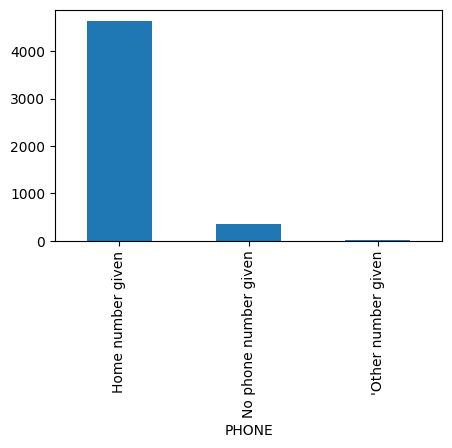

In [9]:
# Bar chart
plt.figure(figsize=(5,3))
df['PHONE'].value_counts().plot.bar()
plt.show()

### 3.	Association with Performance Flag (e.g., PHONE).

a). Obtain a cross-table between variable PHONE and the performance flag FLAGBINARY.

In [10]:
cross1 = pd.crosstab(df['PHONE'],df['FLAGBINARY'], margins=True,margins_name='Total')
cross1

FLAGBINARY,Bad,Good,Total
PHONE,,,
'Other number given,2,14,16
Home number given,645,3988,4633
No phone number given,100,251,351
Total,747,4253,5000


In [11]:
# If you want the percentages given of Bad/ Good for each category:
cross1_proportion=pd.crosstab(df['PHONE'],df['FLAGBINARY'],normalize='index')
cross1_proportion

FLAGBINARY,Bad,Good
PHONE,,
'Other number given,0.125000,0.875000
Home number given,0.139219,0.860781
No phone number given,0.284900,0.715100


Those that give their home numbers have lower credit risks as compared to those that do not give any phone numbers. There is a very small category ‘Other number given’ which should be grouped with any of the bigger categories. Although it has the highest good rate, the number is so small that it would be unwise to rely on these estimates. 

b). Obtain the measures of association between the variables. Interpret the Chi-square statistic.

In [12]:
cross2 = pd.crosstab(df['PHONE'],df['FLAGBINARY'])
cross2

FLAGBINARY,Bad,Good
PHONE,,
'Other number given,2,14
Home number given,645,3988
No phone number given,100,251


In [13]:
stats.chi2_contingency(cross2)
# Chi-square statistic
# P value
# Expected values for each variable

Chi2ContingencyResult(statistic=np.float64(54.566230918555135), pvalue=np.float64(1.416098643949103e-12), dof=2, expected_freq=array([[2.3904000e+00, 1.3609600e+01],
       [6.9217020e+02, 3.9408298e+03],
       [5.2439400e+01, 2.9856060e+02]]))

This table contains x2 statistics that can be used when deciding between different groupings. Remember that Chi-Square Test, is used to examine the association between categorical variables. The null hypothesis 𝐻0: not association; 𝐻𝑎: association. 

<img style="float: left;" src="Chi-Square.png" width=550>

### 4.	Creating new coarse-classified variables (e.g., PHONE).

a). If we decide to merge categories ‘no number given” and ‘other number given’, we need to create a new variable, the coarse-classified variable ‘Phone1’.

In [14]:
df['Phone1'] = df['PHONE']
df.loc[df['PHONE'] == 'Home number given','Phone1'] = 1
df.loc[df['PHONE'] != 'Home number given','Phone1'] = 0
df['Phone1'].value_counts()

Phone1
1    4633
0     367
Name: count, dtype: int64

b). Repeat cross-tabulation as described in section 3 for ‘Phone1’ and performance flag FLAGBINARY.

In [15]:
pd.crosstab(df['Phone1'],df['FLAGBINARY'],margins=True, margins_name='Total')

FLAGBINARY,Bad,Good,Total
Phone1,,,
0,102,265,367
1,645,3988,4633
Total,747,4253,5000


In [16]:
pd.crosstab(df['Phone1'],df['FLAGBINARY'],normalize='index')

FLAGBINARY,Bad,Good
Phone1,,
0,0.277929,0.722071
1,0.139219,0.860781


In [17]:
cross_phone1 = pd.crosstab(df['Phone1'],df['FLAGBINARY'])
cross_phone1

FLAGBINARY,Bad,Good
Phone1,,
0,102,265
1,645,3988


In [18]:
stats.chi2_contingency(cross_phone1)
# Chi-square statistic or Continuity Adj. Chi-Square as in SAS
# P value
# Expected values for each variable

Chi2ContingencyResult(statistic=np.float64(50.4016771400769), pvalue=np.float64(1.2528710642996123e-12), dof=1, expected_freq=array([[  54.8298,  312.1702],
       [ 692.1702, 3940.8298]]))

c). Alternatively, one may decide to merge categories ‘home number given’ and ‘other number given’. Please, create a new variable called ‘Phone2’ by merging these two categories and get the association measures for this new variable and the performance flag.

In [19]:
df['Phone2'] = df['PHONE']
df.loc[df['PHONE'] == 'No phone number given','Phone2'] = 0
df.loc[df['PHONE'] != 'No phone number given','Phone2'] = 1
df['Phone2'].value_counts()

Phone2
1    4649
0     351
Name: count, dtype: int64

In [20]:
pd.crosstab(df['Phone2'],df['FLAGBINARY'],margins=True, margins_name='Total')

FLAGBINARY,Bad,Good,Total
Phone2,,,
0,100,251,351
1,647,4002,4649
Total,747,4253,5000


In [21]:
pd.crosstab(df['Phone2'],df['FLAGBINARY'],normalize='index')

FLAGBINARY,Bad,Good
Phone2,,
0,0.28490,0.71510
1,0.13917,0.86083


In [22]:
cross_phone2 = pd.crosstab(df['Phone2'],df['FLAGBINARY'])
cross_phone2

FLAGBINARY,Bad,Good
Phone2,,
0,100,251
1,647,4002


In [23]:
stats.chi2_contingency(cross_phone2)
# Chi-square statistic or Continuity Adj. Chi-Square as in SAS
# P value
# Expected values for each variable

Chi2ContingencyResult(statistic=np.float64(53.400126480082065), pvalue=np.float64(2.7207933736003236e-13), dof=1, expected_freq=array([[  52.4394,  298.5606],
       [ 694.5606, 3954.4394]]))

### 5.	Weights of Evidence. 

Use cross-tabulation information to calculate WoE for‘Phone1’. Using the method described in 4a) create a new variable (e.g., PhoneWoe)

In [24]:
# Refer to the crosstable of Phone1
pd.crosstab(df['Phone1'],df['FLAGBINARY'],margins=True, margins_name='Total')

FLAGBINARY,Bad,Good,Total
Phone1,,,
0,102,265,367
1,645,3988,4633
Total,747,4253,5000


<img style="float: left;" src="WOE.png" width=550>

Using the method described in section 4a) create a new variable (e.g. PhoneWoe) that would have a value of 0.08 for those that give their home phone numbers and a value of -0.79 otherwise.

In [25]:
df.loc[df['Phone1']==1,'PhoneWoe']=0.08
df.loc[df['Phone1']==0,'PhoneWoe']=-0.79
df.PhoneWoe.value_counts()

PhoneWoe
 0.08    4633
-0.79     367
Name: count, dtype: int64

### 6.	Further Practice.

Now repeat the same procedure, from section 2 to section 5, for marital status ‘MSTAT’. Explore the variable. Get a table of frequencies for the variable and a bar chart. Obtain the cross-tab with the performance flag. Create grouped variables and recode them to dummy and WoE variables.

In [26]:
df['MSTAT'].value_counts()

MSTAT
Married        2537
Single         1739
Divorced        421
Widowed         157
Co-habiting     146
Name: count, dtype: int64

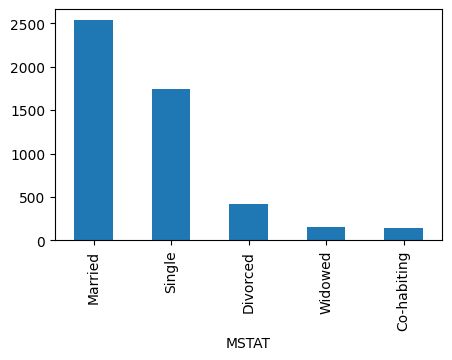

In [27]:
# Bar chart
plt.figure(figsize=(5,3))
df['MSTAT'].value_counts().plot.bar()
plt.show()

In [28]:
pd.crosstab(df['MSTAT'],df['FLAGBINARY'],margins=True,margins_name='Total')

FLAGBINARY,Bad,Good,Total
MSTAT,,,
Co-habiting,20,126,146
Divorced,69,352,421
Married,257,2280,2537
Single,391,1348,1739
Widowed,10,147,157
Total,747,4253,5000


In [29]:
pd.crosstab(df['MSTAT'],df['FLAGBINARY'],normalize='index')

FLAGBINARY,Bad,Good
MSTAT,,
Co-habiting,0.136986,0.863014
Divorced,0.163895,0.836105
Married,0.101301,0.898699
Single,0.224842,0.775158
Widowed,0.063694,0.936306


The best group is ‘Widowed’ (only 6.4% Bads), but it is small, so should be combined with the next best group ‘Married’. ‘Single’ can stay on its own, and ‘Divorced’ and ‘Cohabiting’ can be put together.

In [30]:
df.loc[(df['MSTAT']=='Co-habiting')|(df['MSTAT']=='Divorced'),'MSgrouped']=3
df.loc[df['MSTAT']=='Single','MSgrouped']=2
df.loc[(df['MSTAT']=='Married')|(df['MSTAT']=='Widowed'),'MSgrouped']=1
df.MSgrouped.value_counts()

MSgrouped
1.0    2694
2.0    1739
3.0     567
Name: count, dtype: int64

In [31]:
# Create dummy variables
df['Married1']=0
df['Married2']=0
df.loc[df['MSgrouped']==1,'Married1']=1
df.loc[df['MSgrouped']==2,'Married2']=1
print(df.Married1.value_counts())
print(df.Married2.value_counts())

Married1
1    2694
0    2306
Name: count, dtype: int64
Married2
0    3261
1    1739
Name: count, dtype: int64


In [32]:
pd.crosstab(df['MSgrouped'],df['FLAGBINARY'],margins=True, margins_name='Total')

FLAGBINARY,Bad,Good,Total
MSgrouped,,,
1.0,267,2427,2694
2.0,391,1348,1739
3.0,89,478,567
Total,747,4253,5000


In [33]:
# Create dummy variables
df['MSgroupedWOE'] = df['MSgrouped']
df.loc[df['MSgrouped'] == 1,'MSgroupedWOE'] = np.log((2427*747)/(267*4253)) # 0.4678478372
df.loc[df['MSgrouped'] == 2,'MSgroupedWOE'] = np.log((1348*747)/(391*4253)) # -0.501644979
df.loc[df['MSgrouped'] == 3,'MSgroupedWOE'] = np.log((478*747)/(89*4253)) # -0.058340347
df.MSgroupedWOE.value_counts()

MSgroupedWOE
 0.467848    2694
-0.501645    1739
-0.058340     567
Name: count, dtype: int64